In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, AveragePooling2D
import warnings
warnings.filterwarnings('ignore')

In [3]:
def load_images_and_labels(classes, cur_path, target_size=(32, 32)):
  data = []
  labels = []

  for i in range(classes):
    path = os.path.join(cur_path, 'Train', str(i))

    try:
      images = os.listdir(path)
      for a in images:
        try:
          image = Image.open(os.path.join(path, a))
          resized_image = image.resize(target_size)
          data.append(np.array(resized_image))
          labels.append(i)
        except (OSError, IOError) as e:
          print(f"Error loading image: {a} ({e})")
    except FileNotFoundError:
      print(f"Class directory not found: {path}")

  data = np.array(data)
  labels = np.array(labels)

  return data, labels

# Example usage:
classes = 43
cur_path = "i:\\class\\Term3\\BDM3035\\Project\\"
Glodata, Glolabels = load_images_and_labels(classes, cur_path)


In [4]:
# Make copies of Glodata and Glolabels
cus_data = np.copy(Glodata)
cus_label = np.copy(Glolabels)

Data shape: (21500, 32, 32, 3)
Labels shape: (21500,)


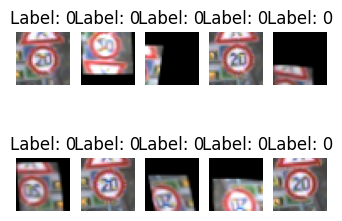

In [7]:
#1...validation of resizing of images

# Check sizes of data and labels
print("Data shape:", cus_data.shape)
print("Labels shape:", cus_label.shape)

# Visualize a few images along with their labels
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 5, figsize=(4,3))
for i, ax in enumerate(axes.flat):
    ax.imshow(cus_data[i])
    ax.set_title(f"Label: {cus_label[i]}")
    ax.axis('off')

plt.show()

In [8]:
#train test split of images

from keras.utils import to_categorical
print("\n",cus_data.shape, cus_label.shape)
X_train, X_test, y_train, y_test = train_test_split(cus_data, cus_label, test_size=0.2, random_state=42)
print("\n",X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print("\n",y_train," ",y_test)
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
print("\n",y_train," ",y_test)


 (21500, 32, 32, 3) (21500,)

 (17200, 32, 32, 3) (4300, 32, 32, 3) (17200,) (4300,)

 [17 21 23 ... 10  1 31]   [40 13 33 ... 16 26 23]

 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]   [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**Custom CNN Model**

In [9]:
# Create a Sequential model
TSRModel_custom = Sequential()

# Add layers to the model
TSRModel_custom.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
TSRModel_custom.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
TSRModel_custom.add(MaxPool2D(pool_size=(2, 2)))
TSRModel_custom.add(Dropout(rate=0.25))
TSRModel_custom.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
TSRModel_custom.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
TSRModel_custom.add(MaxPool2D(pool_size=(2, 2)))
TSRModel_custom.add(Dropout(rate=0.25))
TSRModel_custom.add(Flatten())
TSRModel_custom.add(Dense(256, activation='relu'))
TSRModel_custom.add(Dropout(rate=0.5))
TSRModel_custom.add(Dense(43, activation='softmax'))

# Compilation of the model
TSRModel_custom.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
TSRModel_custom.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          36928     
                                                     

In [10]:
# Number of epochs for training
custom_epochs = 25

# Train the model
custom_history = TSRModel_custom.fit(X_train, y_train, batch_size=32, epochs=custom_epochs, validation_data=(X_test, y_test))

Epoch 1/25


538/538 [==============================] - 41s 68ms/step - loss: 2.7818 - accuracy: 0.3230 - val_loss: 1.1906 - val_accuracy: 0.7298
Epoch 2/25
538/538 [==============================] - 33s 61ms/step - loss: 1.1547 - accuracy: 0.6901 - val_loss: 0.6120 - val_accuracy: 0.8367
Epoch 3/25
538/538 [==============================] - 33s 61ms/step - loss: 0.8078 - accuracy: 0.7749 - val_loss: 0.5072 - val_accuracy: 0.8498
Epoch 4/25
538/538 [==============================] - 32s 60ms/step - loss: 0.6854 - accuracy: 0.8033 - val_loss: 0.4763 - val_accuracy: 0.8621
Epoch 5/25
538/538 [==============================] - 31s 58ms/step - loss: 0.6287 - accuracy: 0.8159 - val_loss: 0.4445 - val_accuracy: 0.8637
Epoch 6/25
538/538 [==============================] - 32s 60ms/step - loss: 0.5933 - accuracy: 0.8226 - val_loss: 0.4397 - val_accuracy: 0.8681
Epoch 7/25
538/538 [==============================] - 31s 58ms/step - loss: 0.5778 - accuracy: 0.8309 - val_loss: 0.4046 - val_accurac

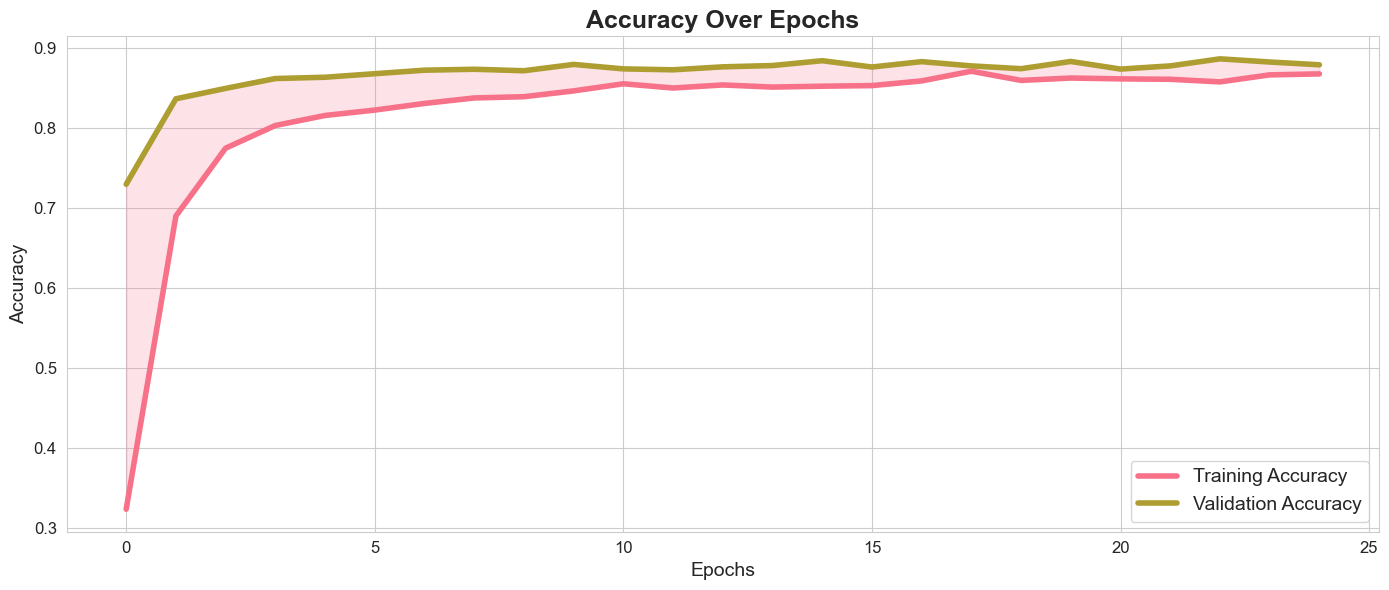

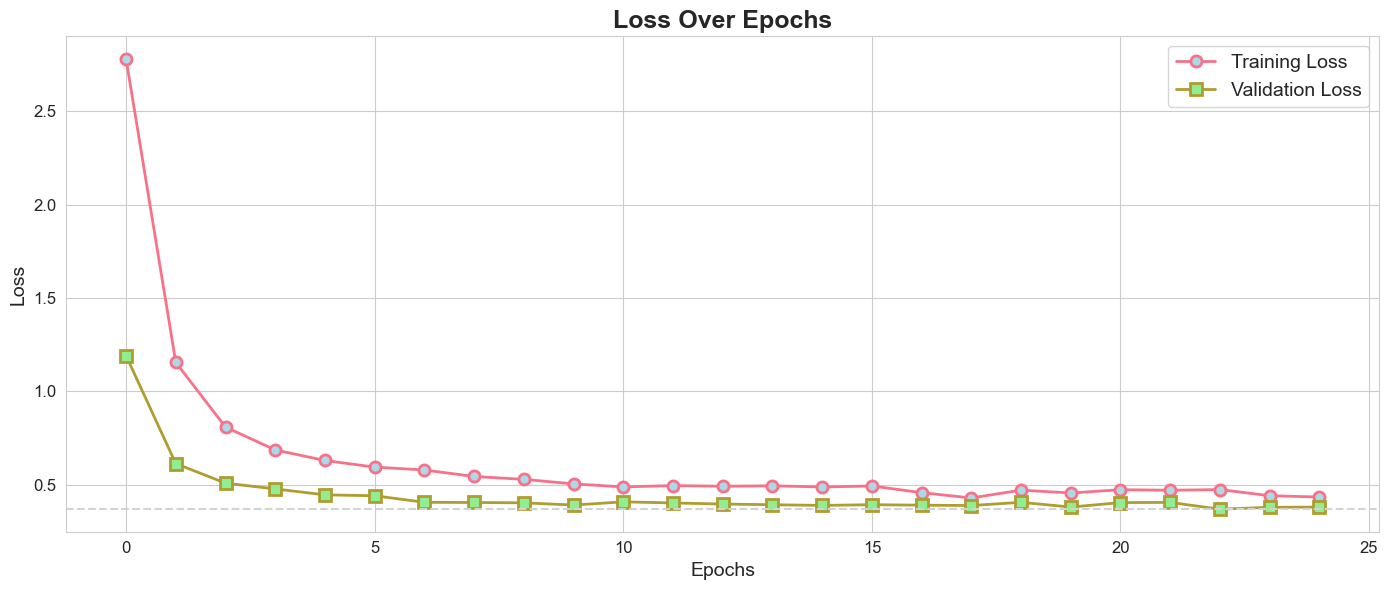

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
 
# Set a visually appealing style
sns.set_style('whitegrid')  # Clean background with gridlines
 
# Employ a vibrant color palette
colors = sns.color_palette('husl', 5)[:2]  # Select first two colors from a rich palette
 
# Plot accuracy with a smooth curve and shaded confidence region
plt.figure(figsize=(14, 6))  # Larger figure size
plt.plot(custom_history.history['accuracy'], label='Training Accuracy', color=colors[0], linewidth=4)
plt.plot(custom_history.history['val_accuracy'], label='Validation Accuracy', color=colors[1], linewidth=4)
plt.fill_between(range(len(custom_history.history['accuracy'])), custom_history.history['accuracy'], custom_history.history['val_accuracy'], alpha=0.2, color=colors[0])  # Shaded confidence region
plt.title('Accuracy Over Epochs', fontsize=18, fontweight='bold')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
 
# Plot loss with a semi-transparent background and enhanced markers
plt.figure(figsize=(14, 6))
plt.plot(custom_history.history['loss'], label='Training Loss', color=colors[0], linewidth=2, marker='o', markersize=8, markerfacecolor='lightblue', markeredgewidth=2)
plt.plot(custom_history.history['val_loss'], label='Validation Loss', color=colors[1], linewidth=2, marker='s', markersize=8, markerfacecolor='lightgreen', markeredgewidth=2)
plt.axhline(y=min(custom_history.history['val_loss']), color='lightgray', linestyle='--', linewidth=1.5)  # Highlight minimum validation loss
plt.title('Loss Over Epochs', fontsize=18, fontweight='bold')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
 
plt.show()

**Testing the custom TSRmodel**

In [12]:
from sklearn.metrics import accuracy_score
import pandas as pd
from PIL import Image
import numpy as np

y_test = pd.read_csv('Test.csv')
labels_1 = y_test["ClassId"].values
imgs = y_test["Path"].values

data = []
for img in imgs:
    image = Image.open(img)
    image = image.resize((32, 32))
    data.append(np.array(image))
X_test = np.array(data)

# Make predictions using predict
custom_pred_probabilities = TSRModel_custom.predict(X_test)  # Get class probabilities
custom_pred = np.argmax(custom_pred_probabilities, axis=1)  # Get class labels from probabilities

# Accuracy calculation
TSRModelACC=accuracy_score(labels_1, custom_pred)
print(TSRModelACC)

395/395 [==============================] - 7s 17ms/step
0.8350752177355503


**ResNet CNN Model**

In [13]:
# Make copies of Glodata and Glolabels
rn_data = np.copy(Glodata)
rn_label = np.copy(Glolabels)

In [14]:
#train test split of images

from keras.utils import to_categorical
print("\n",rn_data.shape, rn_label.shape)
X_train_rn, X_test_rn, y_train_rn, y_test_rn = train_test_split(rn_data, rn_label, test_size=0.2, random_state=42)
print("\n",X_train_rn.shape, X_test_rn.shape, y_train_rn.shape, y_test_rn.shape)
print("\n",y_train_rn," ",y_test_rn)
y_train_rn = to_categorical(y_train_rn, 43)
y_test_rn = to_categorical(y_test_rn, 43)
print("\n",y_train_rn," ",y_test_rn)


 (21500, 32, 32, 3) (21500,)

 (17200, 32, 32, 3) (4300, 32, 32, 3) (17200,) (4300,)

 [17 21 23 ... 10  1 31]   [40 13 33 ... 16 26 23]

 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]   [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [15]:
from tensorflow.keras.applications import ResNet50

# Define the ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

RNModel = Sequential()
RNModel.add(base_model)
RNModel.add(Flatten())
RNModel.add(Dense(120, activation='relu'))
RNModel.add(Dense(84, activation='relu'))
RNModel.add(Dense(43, activation='softmax'))  # Assuming 43 classes for traffic sign recognition

RNModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
RNModel.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 120)               245880    
                                                                 
 dense_3 (Dense)             (None, 84)                10164     
                                                                 
 dense_4 (Dense)             (None, 43)                3655      
                                                                 
Total params: 23847411 (90.97 MB)
Trainable params: 23794291 (90.77 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


In [17]:
# Number of epochs for training
RNepochs = 25
# Train the model
RNhistory = RNModel.fit(X_train_rn, y_train_rn, batch_size=96, epochs=RNepochs, validation_data=(X_test_rn, y_test_rn))

Epoch 1/25
180/180 [==============================] - 339s 2s/step - loss: 0.6233 - accuracy: 0.7967 - val_loss: 0.4252 - val_accuracy: 0.8688
Epoch 2/25
180/180 [==============================] - 366s 2s/step - loss: 0.3595 - accuracy: 0.8844 - val_loss: 0.6385 - val_accuracy: 0.8151
Epoch 3/25
180/180 [==============================] - 345s 2s/step - loss: 0.3103 - accuracy: 0.9027 - val_loss: 0.5822 - val_accuracy: 0.8344
Epoch 4/25
180/180 [==============================] - 330s 2s/step - loss: 0.2496 - accuracy: 0.9219 - val_loss: 0.6109 - val_accuracy: 0.8549
Epoch 5/25
180/180 [==============================] - 307s 2s/step - loss: 0.2630 - accuracy: 0.9226 - val_loss: 0.3942 - val_accuracy: 0.8884
Epoch 6/25
180/180 [==============================] - 332s 2s/step - loss: 0.1907 - accuracy: 0.9394 - val_loss: 0.3429 - val_accuracy: 0.9058
Epoch 7/25
180/180 [==============================] - 348s 2s/step - loss: 0.1903 - accuracy: 0.9419 - val_loss: 0.3638 - val_accuracy: 0.8905

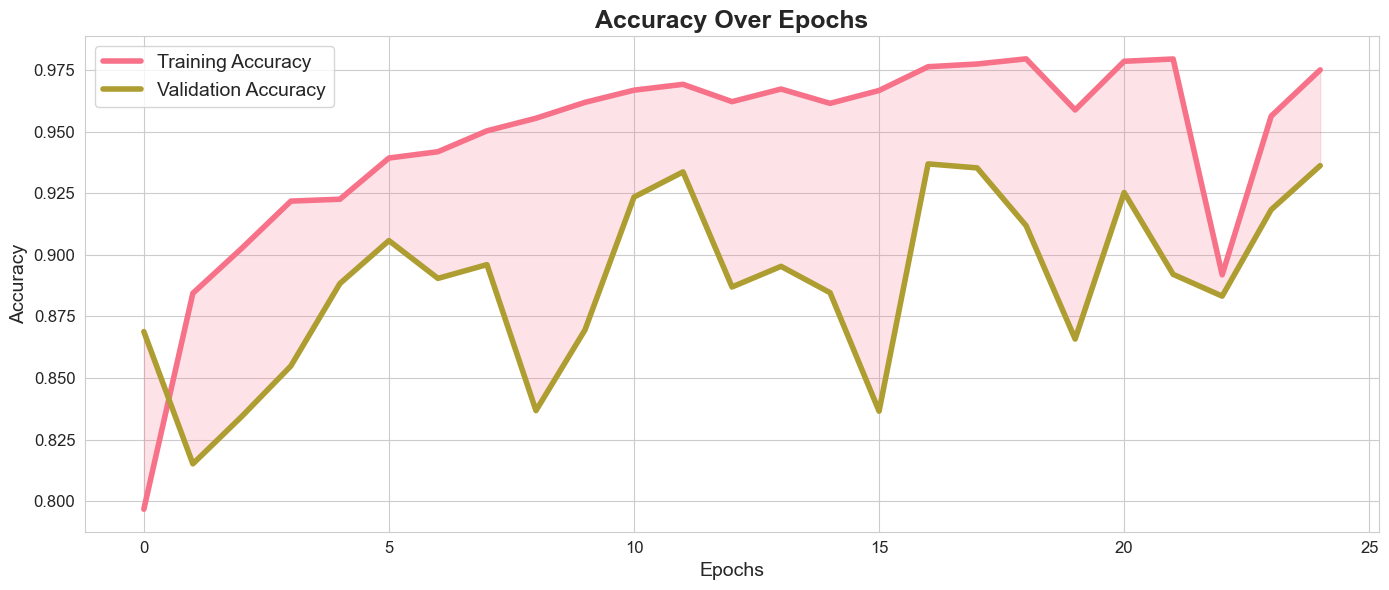

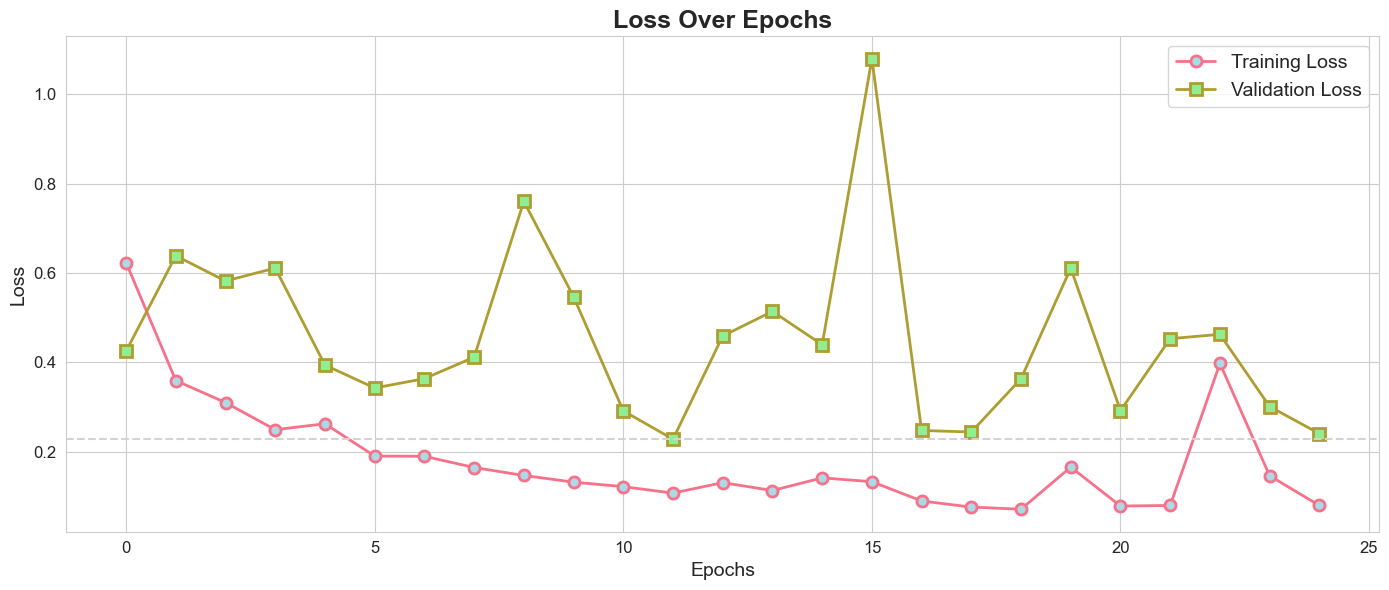

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
 
# Set a visually appealing style
sns.set_style('whitegrid')  # Clean background with gridlines
 
# Employ a vibrant color palette
colors = sns.color_palette('husl', 5)[:2]  # Select first two colors from a rich palette
 
# Plot accuracy with a smooth curve and shaded confidence region
plt.figure(figsize=(14, 6))  # Larger figure size
plt.plot(RNhistory.history['accuracy'], label='Training Accuracy', color=colors[0], linewidth=4)
plt.plot(RNhistory.history['val_accuracy'], label='Validation Accuracy', color=colors[1], linewidth=4)
plt.fill_between(range(len(RNhistory.history['accuracy'])), RNhistory.history['accuracy'], RNhistory.history['val_accuracy'], alpha=0.2, color=colors[0])  # Shaded confidence region
plt.title('Accuracy Over Epochs', fontsize=18, fontweight='bold')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
 
# Plot loss with a semi-transparent background and enhanced markers
plt.figure(figsize=(14, 6))
plt.plot(RNhistory.history['loss'], label='Training Loss', color=colors[0], linewidth=2, marker='o', markersize=8, markerfacecolor='lightblue', markeredgewidth=2)
plt.plot(RNhistory.history['val_loss'], label='Validation Loss', color=colors[1], linewidth=2, marker='s', markersize=8, markerfacecolor='lightgreen', markeredgewidth=2)
plt.axhline(y=min(RNhistory.history['val_loss']), color='lightgray', linestyle='--', linewidth=1.5)  # Highlight minimum validation loss
plt.title('Loss Over Epochs', fontsize=18, fontweight='bold')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
 
plt.show()

Testing Resnet CNN Model

In [19]:
from sklearn.metrics import accuracy_score
import pandas as pd
from PIL import Image
import numpy as np

y_test_rn = pd.read_csv('Test.csv')
labels = y_test_rn["ClassId"].values
imgs = y_test_rn["Path"].values

data = []
for img in imgs:
    image = Image.open(img)
    image = image.resize((32, 32))
    data.append(np.array(image))
X_test_rn = np.array(data)

# Make predictions using predict
rn_pred_probabilities = RNModel.predict(X_test_rn)  # Get class probabilities
rn_pred = np.argmax(rn_pred_probabilities, axis=1)  # Get class labels from probabilities

# Accuracy calculation
ResNetACC=accuracy_score(labels, rn_pred)
print(ResNetACC)

395/395 [==============================] - 68s 164ms/step
0.8146476642913697


**Comparison of our Custom CNN Model: TSRModel and ResNet50 CNN Model**

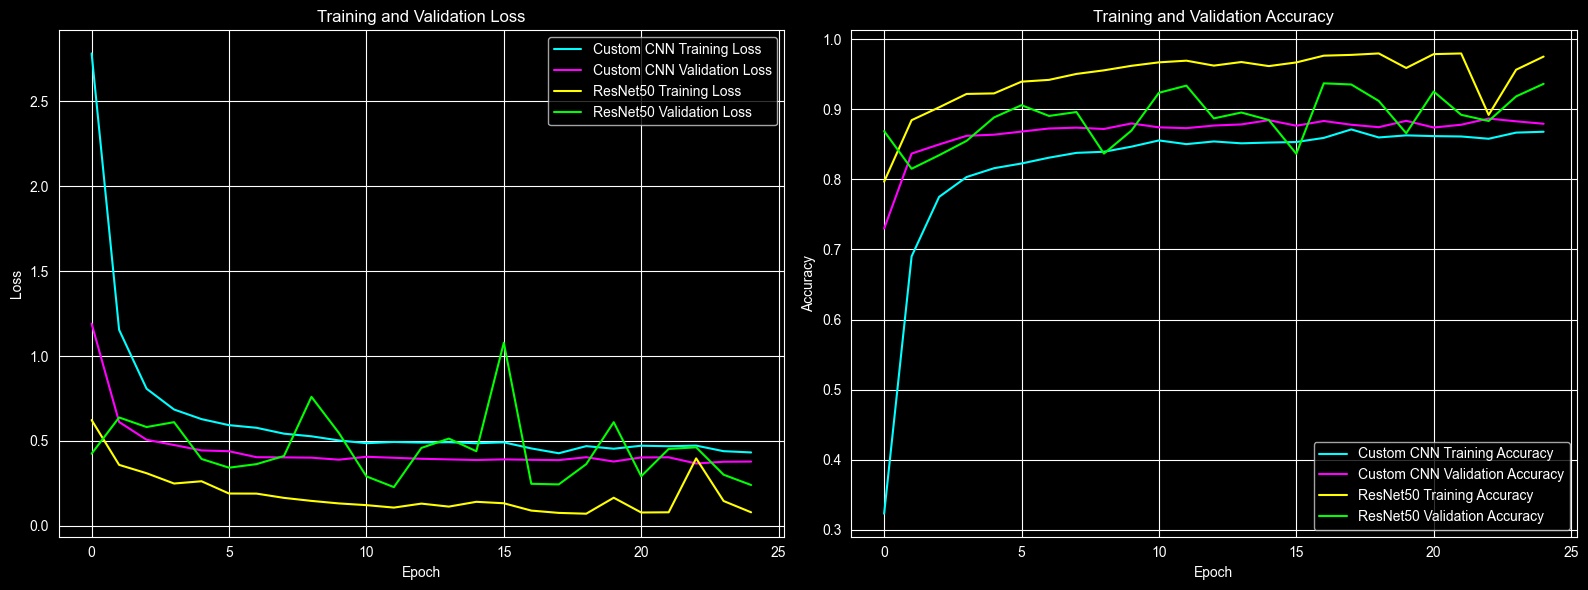

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
plt.style.use('dark_background')

# Plot loss and accuracy side by side
plt.figure(figsize=(16, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(custom_history.history['loss'], label='Custom CNN Training Loss', color='cyan')
plt.plot(custom_history.history['val_loss'], label='Custom CNN Validation Loss', color='magenta')
plt.plot(RNhistory.history['loss'], label='ResNet50 Training Loss', color='yellow')
plt.plot(RNhistory.history['val_loss'], label='ResNet50 Validation Loss', color='lime')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(custom_history.history['accuracy'], label='Custom CNN Training Accuracy', color='cyan')
plt.plot(custom_history.history['val_accuracy'], label='Custom CNN Validation Accuracy', color='magenta')
plt.plot(RNhistory.history['accuracy'], label='ResNet50 Training Accuracy', color='yellow')
plt.plot(RNhistory.history['val_accuracy'], label='ResNet50 Validation Accuracy', color='lime')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


**Comparison of Test Data Accuracy of both Models**

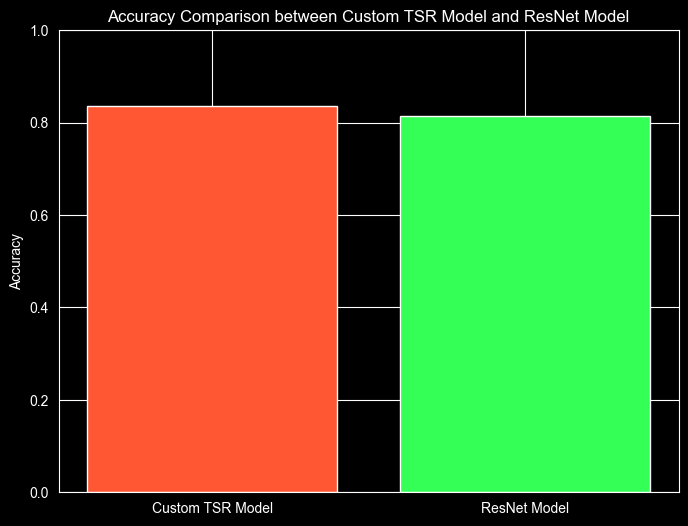

In [22]:
# Plotting the accuracy comparison
plt.figure(figsize=(8, 6))
plt.bar(['Custom TSR Model', 'ResNet Model'], [TSRModelACC, ResNetACC], color=['#FF5733', '#33FF57'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison between Custom TSR Model and ResNet Model')
plt.show()

**Applying ResNet50 Transfer learning on our custom TSRModel**

In [23]:
# Make copies of Glodata and Glolabels
tl_data = np.copy(Glodata)
tl_label = np.copy(Glolabels)

In [24]:
#train test split of images

from keras.utils import to_categorical
print("\n",tl_data.shape, tl_label.shape)
X_train_tl, X_test_tl, y_train_tl, y_test_tl = train_test_split(tl_data, tl_label, test_size=0.2, random_state=42)
print("\n",X_train_tl.shape, X_test_tl.shape, y_train_tl.shape, y_test_tl.shape)
print("\n",y_train_tl," ",y_test_tl)
y_train_tl = to_categorical(y_train_tl, 43)
y_test_tl = to_categorical(y_test_tl, 43)
print("\n",y_train_tl," ",y_test_tl)


 (21500, 32, 32, 3) (21500,)

 (17200, 32, 32, 3) (4300, 32, 32, 3) (17200,) (4300,)

 [17 21 23 ... 10  1 31]   [40 13 33 ... 16 26 23]

 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]   [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [25]:
from tensorflow.keras.models import Model

# Load the ResNet50 model without the top (fully connected) layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the ResNet50 layers
for layer in base_model.layers:
    layer.trainable = False

# Add your custom layers on top
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(43, activation='softmax')(x)  # Assuming 43 classes for traffic sign recognition

# Create the final model
TSRModel_transfer = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
TSRModel_transfer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
TSRModel_transfer.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 38, 38, 3)            0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 16, 16, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 16, 16, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [26]:
# Number of epochs for training
TSRTrans_epochs = 25
# Train the model
TSRTrans_history = TSRModel_transfer.fit(X_train_tl, y_train_tl, batch_size=96, epochs=TSRTrans_epochs, validation_data=(X_test_tl, y_test_tl))

Epoch 1/25
180/180 [==============================] - 87s 430ms/step - loss: 2.6923 - accuracy: 0.2926 - val_loss: 1.5505 - val_accuracy: 0.5223
Epoch 2/25
180/180 [==============================] - 67s 370ms/step - loss: 1.6391 - accuracy: 0.4895 - val_loss: 1.2073 - val_accuracy: 0.6202
Epoch 3/25
180/180 [==============================] - 63s 352ms/step - loss: 1.3332 - accuracy: 0.5749 - val_loss: 1.0281 - val_accuracy: 0.6686
Epoch 4/25
180/180 [==============================] - 64s 358ms/step - loss: 1.1327 - accuracy: 0.6311 - val_loss: 0.9175 - val_accuracy: 0.7049
Epoch 5/25
180/180 [==============================] - 65s 361ms/step - loss: 0.9934 - accuracy: 0.6688 - val_loss: 0.8795 - val_accuracy: 0.7160
Epoch 6/25
180/180 [==============================] - 65s 362ms/step - loss: 0.8892 - accuracy: 0.7003 - val_loss: 0.7858 - val_accuracy: 0.7526
Epoch 7/25
180/180 [==============================] - 65s 361ms/step - loss: 0.8326 - accuracy: 0.7243 - val_loss: 0.7697 - val_ac

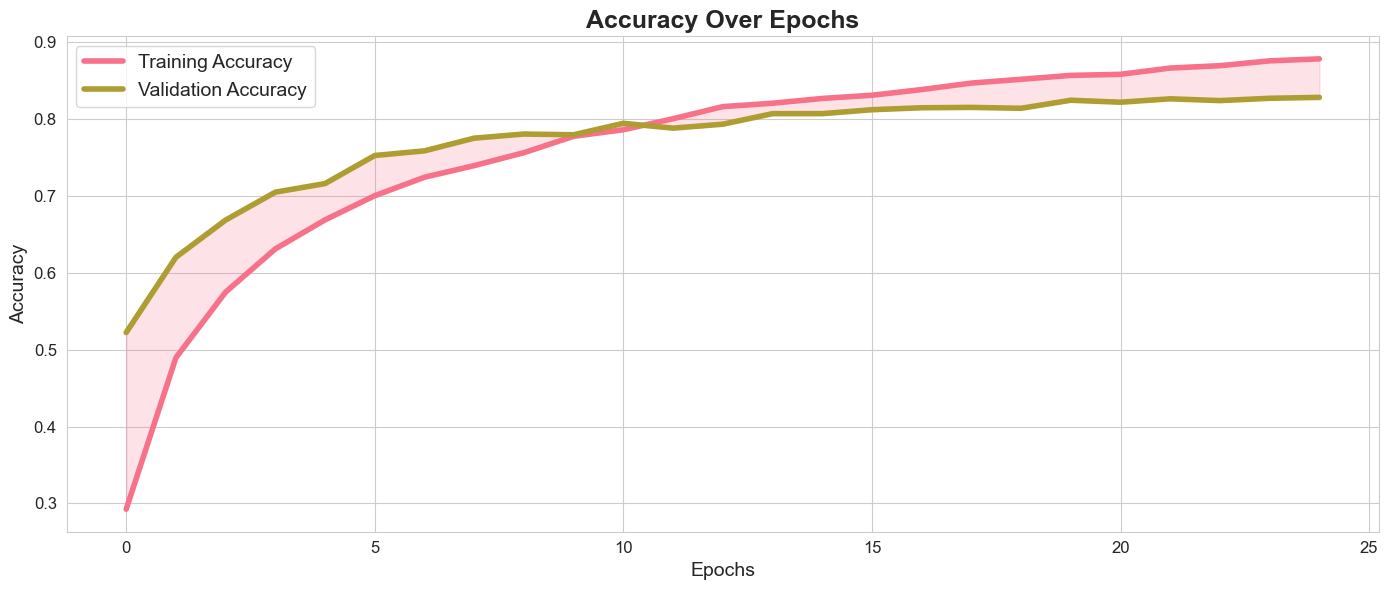

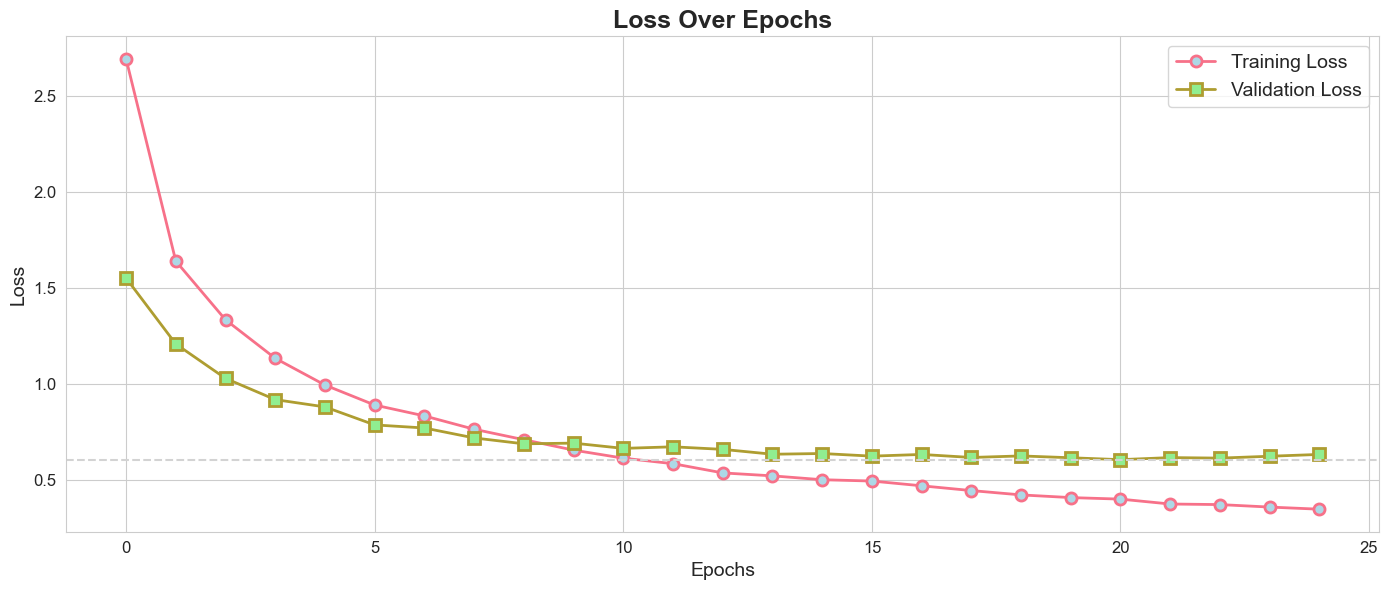

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
 
# Set a visually appealing style
sns.set_style('whitegrid')  # Clean background with gridlines
 
# Employ a vibrant color palette
colors = sns.color_palette('husl', 5)[:2]  # Select first two colors from a rich palette
 
# Plot accuracy with a smooth curve and shaded confidence region
plt.figure(figsize=(14, 6))  # Larger figure size
plt.plot(TSRTrans_history.history['accuracy'], label='Training Accuracy', color=colors[0], linewidth=4)
plt.plot(TSRTrans_history.history['val_accuracy'], label='Validation Accuracy', color=colors[1], linewidth=4)
plt.fill_between(range(len(TSRTrans_history.history['accuracy'])), TSRTrans_history.history['accuracy'], TSRTrans_history.history['val_accuracy'], alpha=0.2, color=colors[0])  # Shaded confidence region
plt.title('Accuracy Over Epochs', fontsize=18, fontweight='bold')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
 
# Plot loss with a semi-transparent background and enhanced markers
plt.figure(figsize=(14, 6))
plt.plot(TSRTrans_history.history['loss'], label='Training Loss', color=colors[0], linewidth=2, marker='o', markersize=8, markerfacecolor='lightblue', markeredgewidth=2)
plt.plot(TSRTrans_history.history['val_loss'], label='Validation Loss', color=colors[1], linewidth=2, marker='s', markersize=8, markerfacecolor='lightgreen', markeredgewidth=2)
plt.axhline(y=min(TSRTrans_history.history['val_loss']), color='lightgray', linestyle='--', linewidth=1.5)  # Highlight minimum validation loss
plt.title('Loss Over Epochs', fontsize=18, fontweight='bold')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
 
plt.show()

**Testing the Transfer learnt TSRModel**

In [ ]:
from sklearn.metrics import accuracy_score
import pandas as pd
from PIL import Image
import numpy as np

y_test_tl = pd.read_csv('Test.csv')
labels = y_test_tl["ClassId"].values
imgs = y_test_tl["Path"].values

data = []
for img in imgs:
    image = Image.open(img)
    image = image.resize((32, 32))
    data.append(np.array(image))
X_test_tl = np.array(data)

# Make predictions using predict
tl_pred_probabilities = TSRModel_transfer.predict(X_test_tl)  # Get class probabilities
tl_pred = np.argmax(tl_pred_probabilities, axis=1)  # Get class labels from probabilities

# Accuracy calculation
TSRTransACC=accuracy_score(labels, tl_pred)
print(TSRTransACC)

395/395 [==============================] - 41s 104ms/step
0.39699129057798893


**Regularized TSR Model**

In [31]:
# Make copies of Glodata and Glolabels
tsreg_data = np.copy(Glodata)
tsreg_label = np.copy(Glolabels)

In [32]:
#train test split of images

from keras.utils import to_categorical
print("\n",tsreg_data.shape, tsreg_label.shape)
X_train_tsreg, X_test_tsreg, y_train_tsreg, y_test_tsreg = train_test_split(tsreg_data, tsreg_label, test_size=0.2, random_state=42)
print("\n",X_train_tsreg.shape, X_test_tsreg.shape, y_train_tsreg.shape, y_test_tsreg.shape)
print("\n",y_train_tsreg," ",y_test_tsreg)
y_train_tsreg = to_categorical(y_train_tsreg, 43)
y_test_tsreg = to_categorical(y_test_tsreg, 43)
print("\n",y_train_tsreg," ",y_test_tsreg)


 (21500, 32, 32, 3) (21500,)

 (17200, 32, 32, 3) (4300, 32, 32, 3) (17200,) (4300,)

 [17 21 23 ... 10  1 31]   [40 13 33 ... 16 26 23]

 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]   [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [33]:
from tensorflow.keras.regularizers import l2

# Create a Sequential model
TSRReg_custom = Sequential()

# Add layers to the model with L2 regularization
TSRReg_custom.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:], kernel_regularizer=l2(0.01)))
TSRReg_custom.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', kernel_regularizer=l2(0.01)))
TSRReg_custom.add(MaxPool2D(pool_size=(2, 2)))
TSRReg_custom.add(Dropout(rate=0.25))
TSRReg_custom.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.01)))
TSRReg_custom.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.01)))
TSRReg_custom.add(MaxPool2D(pool_size=(2, 2)))
TSRReg_custom.add(Dropout(rate=0.25))
TSRReg_custom.add(Flatten())
TSRReg_custom.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
TSRReg_custom.add(Dropout(rate=0.5))
TSRReg_custom.add(Dense(43, activation='softmax', kernel_regularizer=l2(0.01)))

# Compilation of the model
TSRReg_custom.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
TSRReg_custom.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 32)        25632     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 10, 10, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 64)          36928     
                                                      

In [34]:
# Number of epochs for training
TSRReg_epochs = 25
# Train the model
TSRReg_history = TSRReg_custom.fit(X_train_tsreg, y_train_tsreg, batch_size=32, epochs=TSRReg_epochs, validation_data=(X_test_tsreg, y_test_tsreg))

Epoch 1/25
538/538 [==============================] - 35s 59ms/step - loss: 6.9960 - accuracy: 0.3008 - val_loss: 3.9107 - val_accuracy: 0.7674
Epoch 2/25
538/538 [==============================] - 31s 58ms/step - loss: 3.2651 - accuracy: 0.7123 - val_loss: 2.3100 - val_accuracy: 0.8388
Epoch 3/25
538/538 [==============================] - 31s 58ms/step - loss: 2.2480 - accuracy: 0.7789 - val_loss: 1.7537 - val_accuracy: 0.8530
Epoch 4/25
538/538 [==============================] - 32s 60ms/step - loss: 1.7943 - accuracy: 0.8085 - val_loss: 1.5001 - val_accuracy: 0.8498
Epoch 5/25
538/538 [==============================] - 32s 59ms/step - loss: 1.5987 - accuracy: 0.8159 - val_loss: 1.3579 - val_accuracy: 0.8600
Epoch 6/25
538/538 [==============================] - 32s 60ms/step - loss: 1.4950 - accuracy: 0.8229 - val_loss: 1.2967 - val_accuracy: 0.8640
Epoch 7/25
538/538 [==============================] - 32s 59ms/step - loss: 1.4326 - accuracy: 0.8276 - val_loss: 1.2895 - val_accuracy:

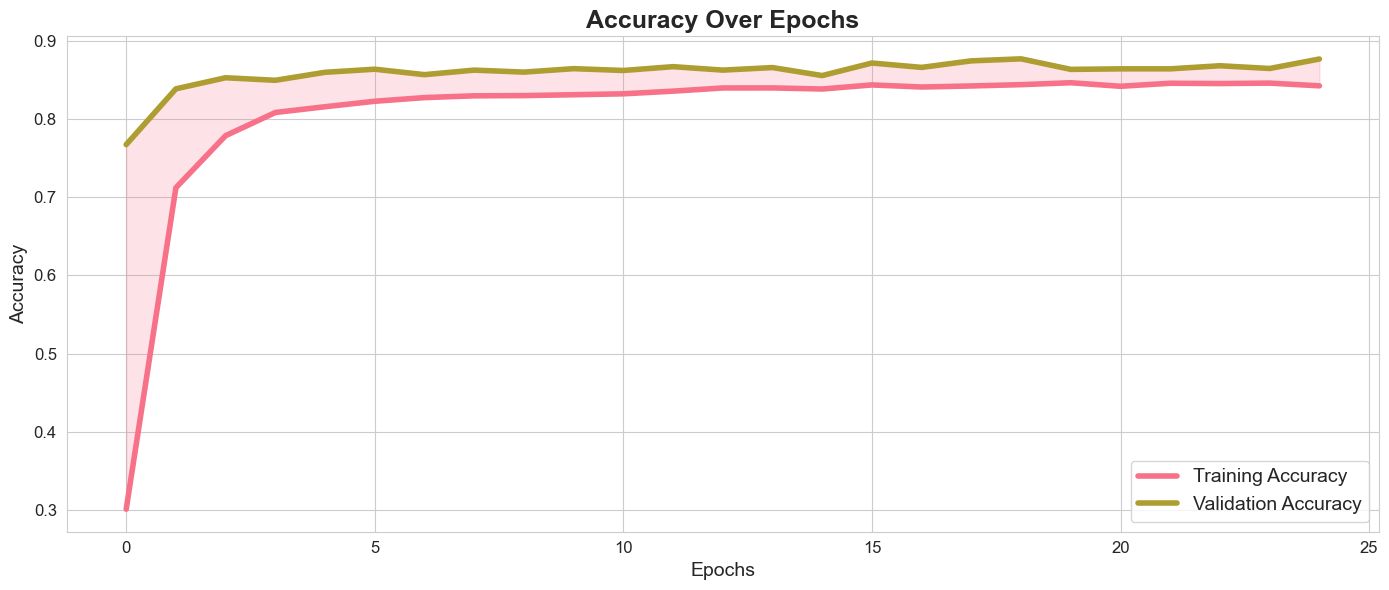

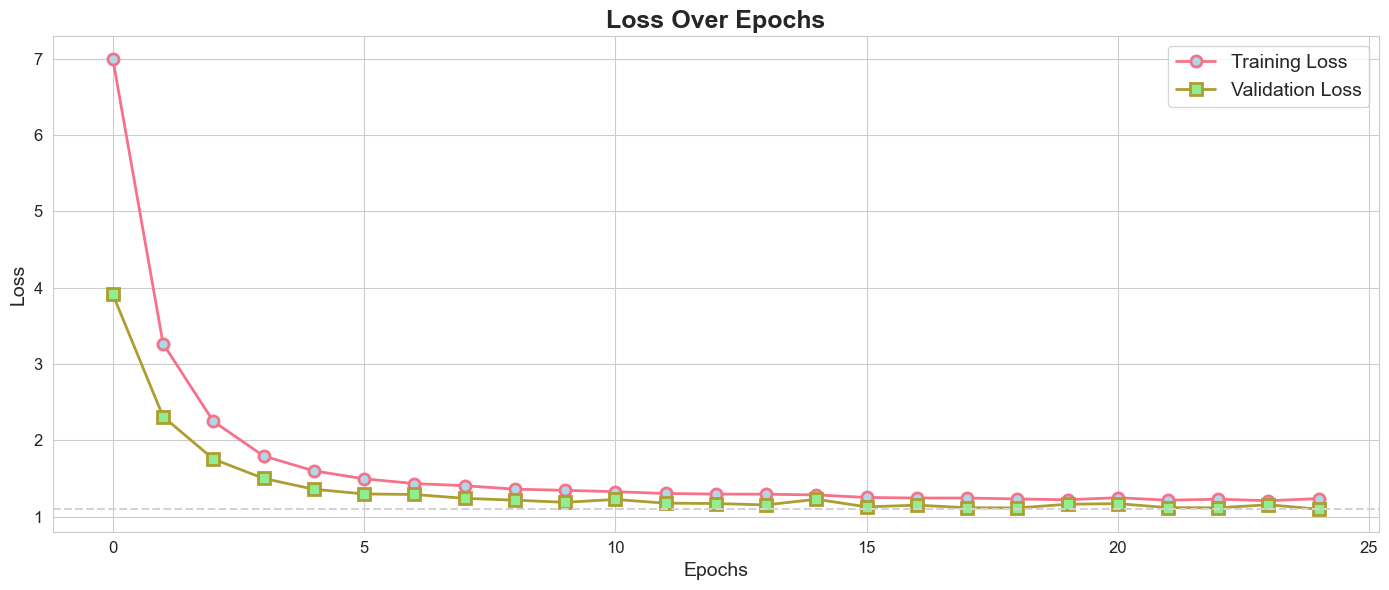

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
 
# Set a visually appealing style
sns.set_style('whitegrid')  # Clean background with gridlines
 
# Employ a vibrant color palette
colors = sns.color_palette('husl', 5)[:2]  # Select first two colors from a rich palette
 
# Plot accuracy with a smooth curve and shaded confidence region
plt.figure(figsize=(14, 6))  # Larger figure size
plt.plot(TSRReg_history.history['accuracy'], label='Training Accuracy', color=colors[0], linewidth=4)
plt.plot(TSRReg_history.history['val_accuracy'], label='Validation Accuracy', color=colors[1], linewidth=4)
plt.fill_between(range(len(TSRReg_history.history['accuracy'])), TSRReg_history.history['accuracy'], TSRReg_history.history['val_accuracy'], alpha=0.2, color=colors[0])  # Shaded confidence region
plt.title('Accuracy Over Epochs', fontsize=18, fontweight='bold')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
 
# Plot loss with a semi-transparent background and enhanced markers
plt.figure(figsize=(14, 6))
plt.plot(TSRReg_history.history['loss'], label='Training Loss', color=colors[0], linewidth=2, marker='o', markersize=8, markerfacecolor='lightblue', markeredgewidth=2)
plt.plot(TSRReg_history.history['val_loss'], label='Validation Loss', color=colors[1], linewidth=2, marker='s', markersize=8, markerfacecolor='lightgreen', markeredgewidth=2)
plt.axhline(y=min(TSRReg_history.history['val_loss']), color='lightgray', linestyle='--', linewidth=1.5)  # Highlight minimum validation loss
plt.title('Loss Over Epochs', fontsize=18, fontweight='bold')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
 
plt.show()

Testing the Regularized model

In [36]:
from sklearn.metrics import accuracy_score
import pandas as pd
from PIL import Image
import numpy as np

y_test_tsreg = pd.read_csv('Test.csv')
labels = y_test_tsreg["ClassId"].values
imgs = y_test_tsreg["Path"].values

data = []
for img in imgs:
    image = Image.open(img)
    image = image.resize((32, 32))
    data.append(np.array(image))
X_test_tsreg = np.array(data)

# Make predictions using predict
tsreg_pred_probabilities = TSRModel_transfer.predict(X_test_tsreg)  # Get class probabilities
tsreg_pred = np.argmax(tsreg_pred_probabilities, axis=1)  # Get class labels from probabilities

# Accuracy calculation
TSRRegACC=accuracy_score(labels, tsreg_pred)
print(TSRRegACC)

395/395 [==============================] - 66s 160ms/step
0.3955661124307205
